In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.9.2
Num GPUs Available:  1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# I like the descriptive variables (images and labels; instead of X and Y)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Name classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore Data

In [4]:
train_images.shape
len(train_labels)
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
test_images.shape
len(test_labels)

10000

## Preprocess the data

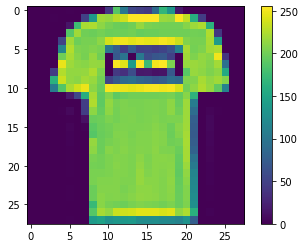

In [6]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# Normalize data
train_images = train_images / 255.0
test_images = test_images / 255.0

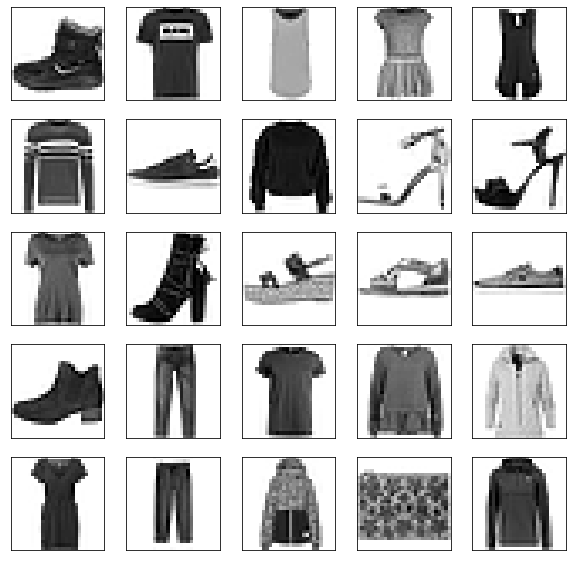

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='white')
plt.show()

## Build the model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-08-22 12:28:38.087204: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-22 12:28:38.087319: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Compile the model
During compile, three things are added/defined:
1. Loss function
2. Optimization (how the model is updated based on data + loss function)
3. Metrics (for monitoring the success)

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2022-08-22 12:29:13.315323: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-22 12:29:13.475842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4933 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3751 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3384 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3138 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2950 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2806 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2685 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2591 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2494 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2409 - accurac

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy:', test_acc)

2022-08-22 12:34:11.857741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3475 - accuracy: 0.8785 - 1s/epoch - 4ms/step
Test accuracy: 0.8785000443458557


## Make Predictions

In [14]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

110/313 [=========>....................] - ETA: 0s

2022-08-22 12:42:21.651812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


In [15]:
predictions[0]

array([6.37299946e-09, 1.95673078e-11, 1.66846337e-09, 1.75598325e-09,
       8.00493227e-10, 1.65163408e-04, 1.03724005e-07, 7.98146415e-04,
       2.71728834e-10, 9.99036551e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

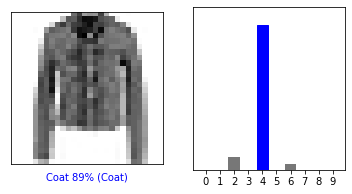

In [28]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

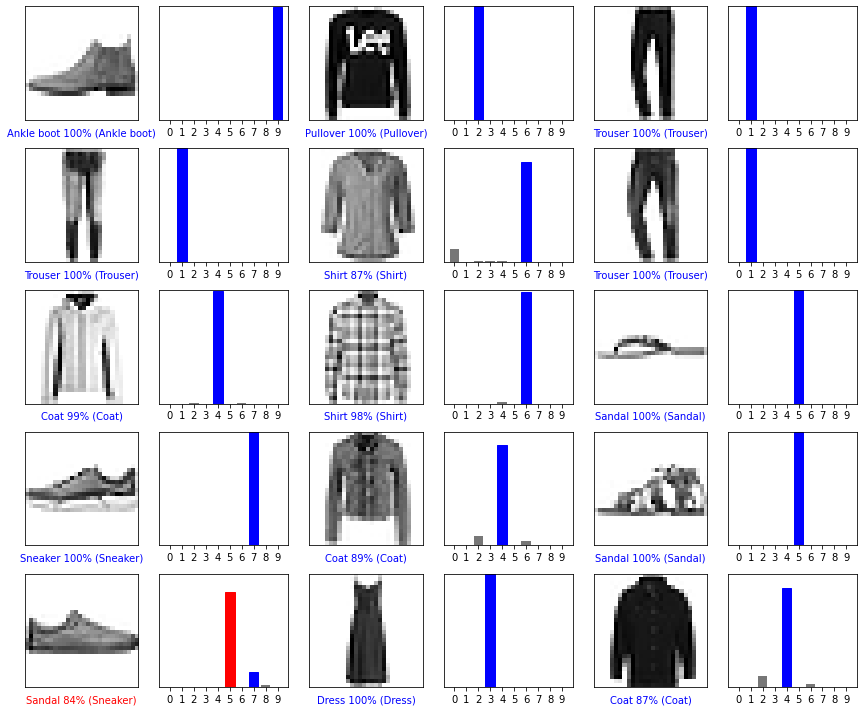

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use model

In [32]:
img = test_images[3]

print(img.shape)

# tf.keras models are optimized to make predictions on a batch... so add the image to the list as the only element
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 351ms/step
[[9.3825250e-08 9.9999547e-01 2.6090172e-09 4.4639914e-06 2.3221935e-09
  1.9871013e-13 1.7827239e-09 6.9603347e-21 1.5748767e-09 1.3285031e-15]]


(1, 28, 28)
